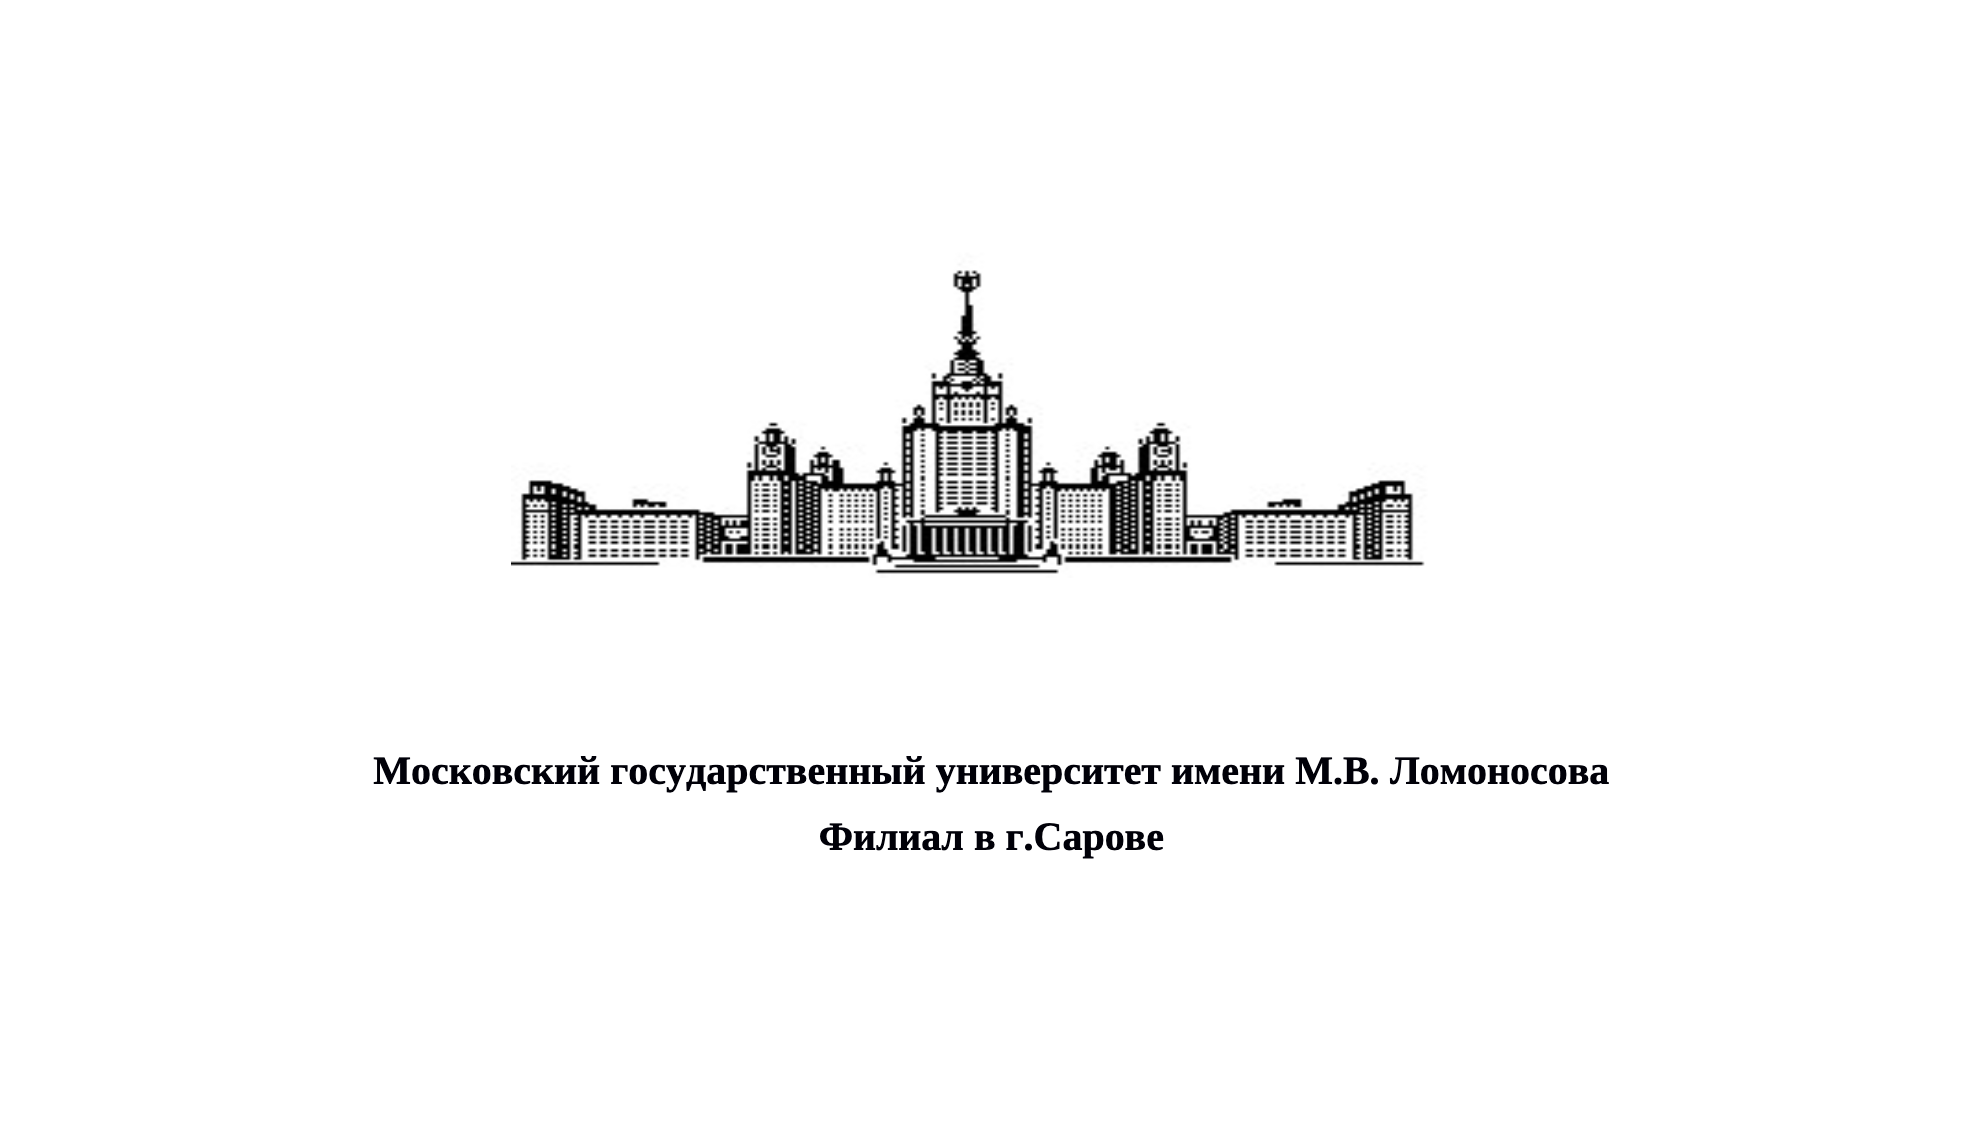

<center>Руденко А.С.</center>

<center>Практикум по теме "Метод главных компонент (PCA)"</center>

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# PCA

Сегодня будем заниматься PCA (principal component analysis)


Как ставится задача?

Допустим, у нас есть **отцентрированная** матрица $X$, по строкам у которой идут  наблюдения, а по столбцам признаки каждого наблюдения.

Задача PCA - перейти на новую систеему координат, где вдоль каждого направления располагается наибольшее количество наблюдений.



$$
\text{maximize}\,\,{c^T X^T X c}\\
\text{s.t}\,\,\,\, c^T c = 1
$$

$ X^T X$ квадратная матрица ковариациии признаков.

##**PCA Algoritm**

1) Центрируем данные

$$
\overline{X} = X - \mu
$$

где $\mu$ среднее по наблюдеем для каждого признака

2) Строим сатрицу ковариации.  $X_{centered}$ размера $n \times m$. $n$ -количество наблюдений, $m$ - количество признаков.

$$
 Σ = \frac{1}{n-1} \overline{X}^{\top} \overline{X}
$$


3)  считаем спектральное разложение для$Σ$

$$
Σ = V^{-1} Λ V
$$

где $V$ is собственные вектора, and $\Lambda$ диагональ с собственными значениями

4) Сортируем собственные числа от бОльшего к меньшему

5) Берем первыу $k$ векторов, соответствующие $k$ наибольшим числам

$$
W = V[:, :k] Λ[:, :k]
$$

6) Проектируем наши данные на новые координаты

$$
T = \overline{X} W
$$

A v = $\lambda$ v

In [ ]:
# you will need internet connection for this block
csv_url = "https://raw.githubusercontent.com/hsu-ai-course/hsu.ai/master/code/datasets/ml/nutrition.csv"
dataset = pd.read_csv(csv_url)




In [ ]:
# there are no (0) saturated fats in vegetables, that's why we replace N/A values with 0
dataset = dataset.fillna(0)


In [ ]:
dataset.describe()

,Calories,Calories from Fat
count,62.000000,62.000000
mean,71.370968,9.193548
std,44.299367,17.419453
min,0.000000,0.000000
25%,25.000000,0.000000
50%,80.000000,0.000000
75%,100.000000,10.000000
max,200.000000,90.000000


In [ ]:
classes_list = dataset["Food Type"][1:].values
names = dataset["Food and Serving"][1:].values
dimensions = dataset.columns[1:]

print("Names:", *names[:5], "...", sep=" | ")
print()
print("Classes:", *set(classes_list), sep=" | ")
print()
print("Dimensions:", *dimensions[:5], "...", sep=" | ")

dataset.head()

Names: | Asparagus, 5 spears (93 g/3.3 oz) | Bell Pepper, 1 medium (148 g/5.3 oz) | Broccoli, 1 medium stalk (148 g/5.3 oz) | Carrot, 1 carrot, 7" long, 1 1/4" diameter (78 g/2.8 oz) | Cauliflower, 1/6 medium head (99 g/3.5 oz) | ...

Classes: | Fruits Serving Size (gram weight/ounce weight) | Vegetables, Serving Size (gram weight/ ounce weight) | Seafood, Serving Size (84 g/3 oz)

Dimensions: | Calories | Calories from Fat | Total Fat 1 | Total Fat 2 | Sodium 1 | ...


,Food and Serving,Calories,Calories from Fat,Total Fat 1,Total Fat 2,Sodium 1,Sodium 2,Potassium 1,Potassium 2,Total Carbo-hydrate 1,...,Protein,Vitamin A,Vitamin C,Calcium,Iron,Saturated Fat,Saturated Fat 2,Chole-sterol 1,Chole-sterol 2,Food Type
0,0,0.0,0.0,(g),(%DV),(g),(%DV),(g),(%DV),(g),...,(g),(%DV),(%DV),(%DV),(%DV),(%DV),(mg),(%DV),(mg),0
1,"Asparagus, 5 spears (93 g/3.3 oz)",20.0,0.0,0,0,0,0,230,7,4,...,2,10,15,2,2,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."
2,"Bell Pepper, 1 medium (148 g/5.3 oz)",25.0,0.0,0,0,40,2,220,6,6,...,1,4,190,2,4,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."
3,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45.0,0.0,0.5,1,80,3,460,13,8,...,4,6,220,6,6,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."
4,"Carrot, 1 carrot, 7"" long, 1 1/4"" diameter (78...",30.0,0.0,0,0,60,3,250,7,7,...,1,110,10,2,2,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."


In [ ]:
len(dimensions)

23

In [ ]:
dimensions

Index(['Calories', 'Calories from Fat', 'Total Fat 1', 'Total Fat 2',
       'Sodium 1', 'Sodium 2', 'Potassium 1', 'Potassium 2',
       'Total Carbo-hydrate 1', 'Total Carbo-hydrate 2', 'Dietary Fiber 1',
       'Dietary Fiber 2', 'Sugars', 'Protein', 'Vitamin A', 'Vitamin C',
       'Calcium', 'Iron', 'Saturated Fat', 'Saturated Fat 2', 'Chole-sterol 1',
       'Chole-sterol 2', 'Food Type'],
      dtype='object')

In [ ]:
classes = list(set(classes_list))
colors = ["red", "green", "blue", "black", "magenta"]
class_colors = {}
for i in range(len(classes)):
    class_colors[classes[i]] = colors[i % len(colors)]

print(class_colors)
color_list = [class_colors[a] for a in classes_list]

{'Fruits Serving Size (gram weight/ounce weight)': 'red', 'Vegetables, Serving Size (gram weight/ ounce weight)': 'green', 'Seafood, Serving Size (84 g/3 oz)': 'blue'}


In [ ]:
def show_points_2d(X, Y, xaxis, yaxis):
    global names, classes_list, class_colors
    plt.figure(figsize=(15,10))
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    classes = set()
    for x, y, name, label in zip(X, Y, names, classes_list):
        if not label in classes:
            plt.plot([x], [y], "o", markersize=20, color=class_colors[label], label=label)
            classes.add(label)
        else:
            plt.plot([x], [y], "o", markersize=20, color=class_colors[label])
        plt.text(x, y, name)
    plt.legend()
    plt.axvline(0)
    plt.axhline(0)
    plt.show()

def show_points_3d(X, Y, Z):
    global color_list
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    for x, y, z, color in zip(X, Y, Z, color_list):
        ax.scatter([x], [y], [z], marker='o', color=color)
    plt.show()

def show_matrix(A, xaxis, yaxis):
    plt.figure(figsize=(15,10))
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.imshow(A)
    plt.show()

Raw matrix values, columns are objects (61, 22)


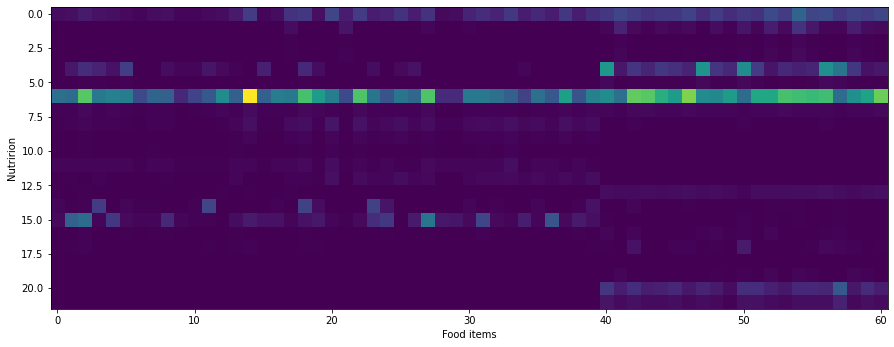

2 random dimensions distribution


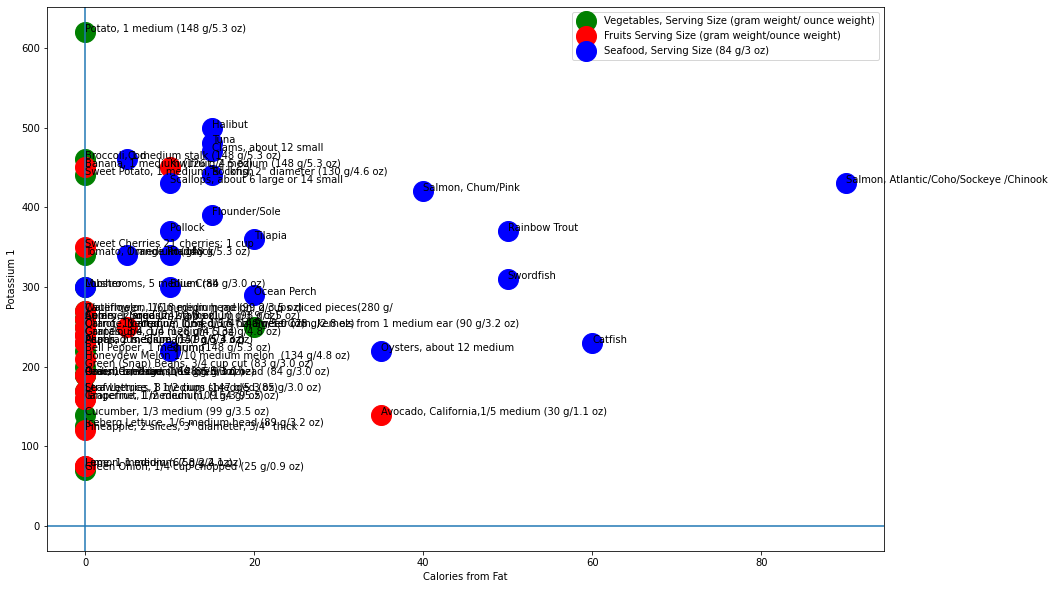

In [ ]:
A = dataset.to_numpy()[1:,1:-1].astype('float64')
print("Raw matrix values, columns are objects", A.shape)
show_matrix(A.T, "Food items", "Nutririon")

print("2 random dimensions distribution")
show_points_2d(A.T[1], A.T[6], dimensions[1], dimensions[6])

In [ ]:
%matplotlib inline

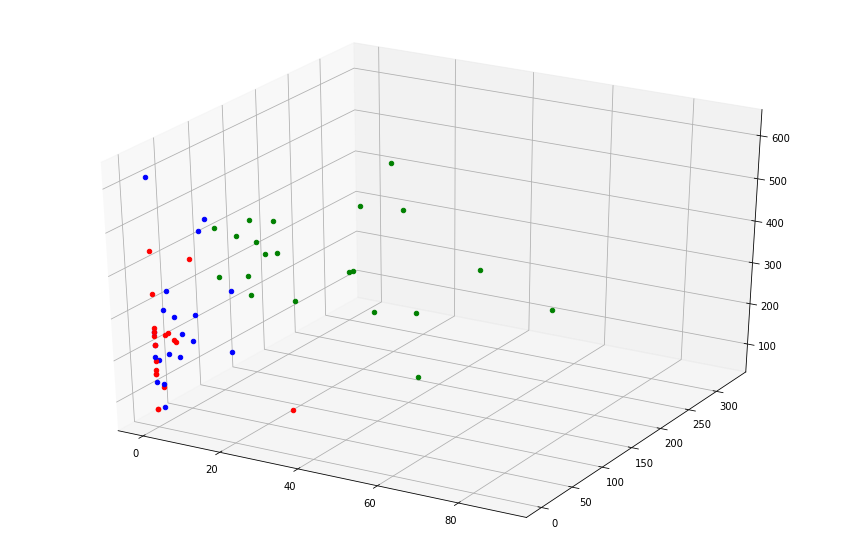

In [ ]:
show_points_3d(A.T[1], A.T[4], A.T[6])

2 random dimensions distribution centered


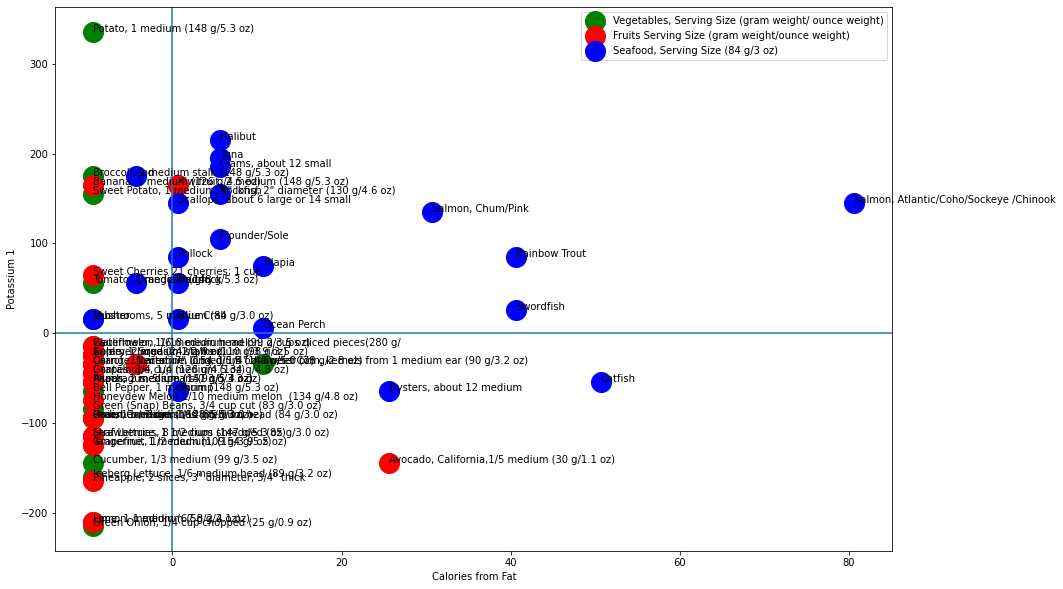

In [ ]:
def centered(A):
  C = A.copy()
  centers =np.mean(A, axis= 0)
  C = A.T - centers.reshape((22,1))
  return C.T



Ac = centered(A)

assert np.allclose(np.mean(Ac, axis=0), np.zeros((22, 1))), "After centering, average value of the column should be equal to 0"

print("2 random dimensions distribution centered")
show_points_2d(Ac.T[1], Ac.T[6], dimensions[1], dimensions[6])

# ПОДХОД ОСНОВАННЫЙ НА СПЕКТРАЛЬНОМ РАЗЛОЖЕНИИ

#**Eigen Decomposition**

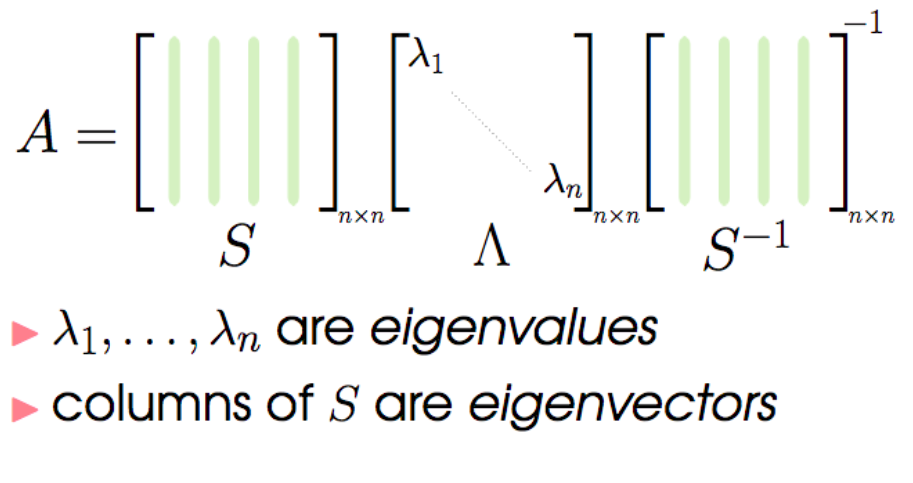

cov(X) = X.T @ X /(n-1)

In [ ]:
a = np.array([[2,3]])
b = np.array([[90,7]])

In [ ]:
a.dot(b.T)

array([[201]])

In [ ]:
a@ b.T

array([[201]])

In [ ]:
np.outer(a, b)

array([[180,  14],
       [270,  21]])

In [ ]:
a.T@b

array([[180,  14],
       [270,  21]])

In [ ]:
cov2 = np.cov(Ac.T)

In [ ]:
def covariance_matrix(Ac):
  n, m = Ac.shape
  cov = Ac.T @ Ac/(n-1)
  return cov

cov1 = covariance_matrix(Ac)

In [ ]:
assert np.linalg.norm(cov1-cov2) <10**(-10)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov1)

assert np.isclose(np.linalg.norm(eigenvalues[0] * eigenvectors[:, 0] - cov2 @ eigenvectors[:, 0]), 0)


In [ ]:
eigenvalues

array([ 1.65060377e+04,  7.10326747e+03,  2.80440726e+03,  1.22112257e+03,
        7.48025129e+02,  4.03859737e+02,  1.78726123e+02,  4.47815321e+01,
        2.11074915e+01,  1.06621381e+01,  4.40149961e+00,  3.43475286e+00,
        1.23268269e+00,  2.83646549e-01,  1.95395949e-01,  7.84224849e-02,
        5.33738624e-02,  3.91664626e-02,  1.86617070e-02,  4.06580074e-03,
        2.27431151e-04, -5.44140250e-16])

U la

In [ ]:
inds = np.argsort(-eigenvalues)
eigenvalues = eigenvalues[inds]
eigenvectors = eigenvectors[:, inds]

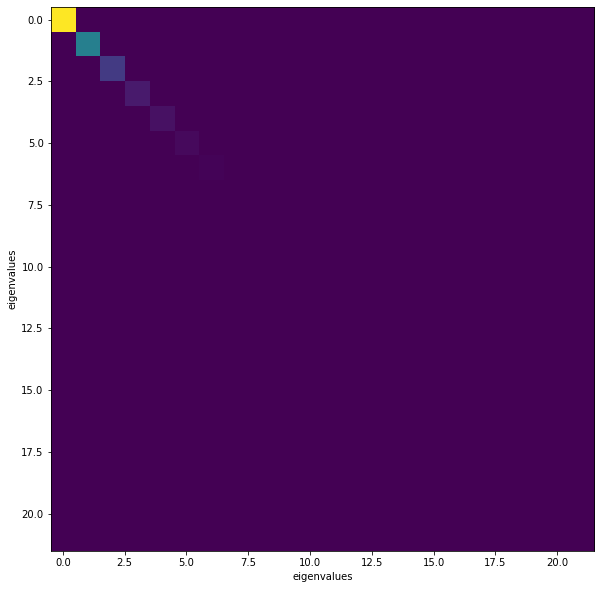

In [ ]:
show_matrix(np.diag(eigenvalues), "eigenvalues", "eigenvalues")

In [ ]:
np.diag(eigenvalues)

# QR алгоритм (как бонус)

Consider Eigen Decomposition

$$
A = Q T Q^{*}
$$

We can rewrite it the following way

$$
Q T = A Q
$$

We can write down the iterative process

$$
Q_{k+1} R_{k+1}  = A Q_{k}, \: \: \: \: \: \: \: \: Q^{*}_{k+1}  A  =R_{k+1}  Q^{*}_{k}
$$

Introduce

$$
A_k = Q^{*}_{k} A Q_{k} = Q^{*}_{k} Q_{k+1} R_{k+1} = 	\widehat{Q}_{k} R_{k+1}
$$

And the new approximation

$$
A_{k+1} = Q^{*}_{k+1} A Q_{k+1} = (Q^{*}_{k+1}  A  =R_{k+1}) =  R_{k+1} \widehat{Q}_{k}
$$

## SO we can come up with the QR algoritm

1) Set $A_0 = A$


2) Compute QR factorization $A_k = Q_k R_k$




3) Set $A_{k+1} = R_k Q_k $

A v = l v

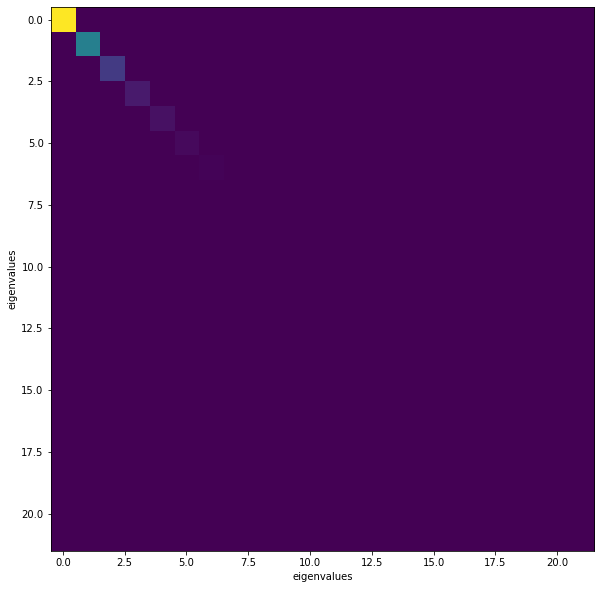

In [ ]:
def QR_algorithm(X, iters=10000):
    A = X.copy()
    PQ = np.eye(A.shape[0])

    for i in range(iters):
        Q, R = np.linalg.qr(A)
        A = R@Q
        PQ = PQ@ Q


    return np.diag(A), PQ

eigenvalues, eigenvectors = QR_algorithm(cov2)
assert np.isclose(np.linalg.norm(eigenvalues[0] * eigenvectors[:, 0] - cov2 @ eigenvectors[:, 0]), 0),  "This was pretty simple eigenvalues test. And you failed even the test :("

show_matrix(np.diag(eigenvalues), "eigenvalues", "eigenvalues")
# show_matrix(eigenvectors, "eigenvectors", "")

In [ ]:
eigenvectors.shape

(22, 22)

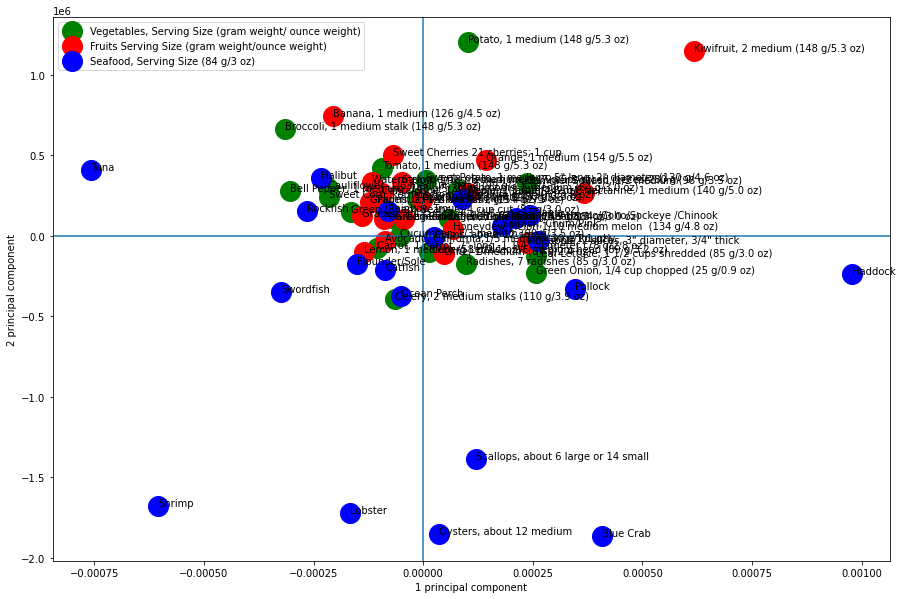

In [ ]:
show_points_2d(Ak.T[0],Ak.T[1],  "1 principal component", "2 principal component")

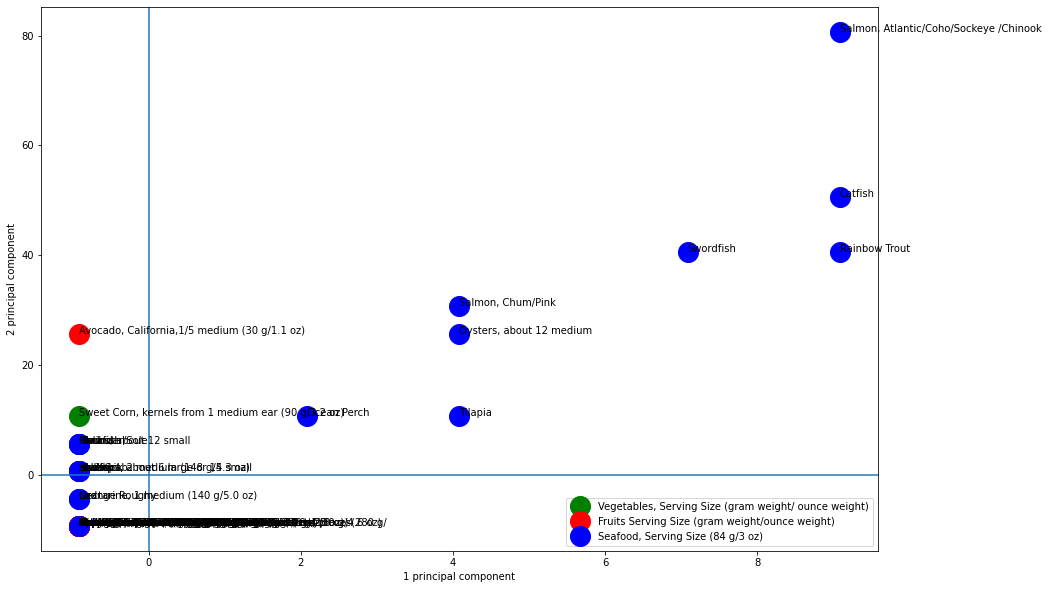

In [ ]:
show_points_2d(Ac.T[0],Ac.T[1], "1 principal component", "2 principal component")

2 first dimensions


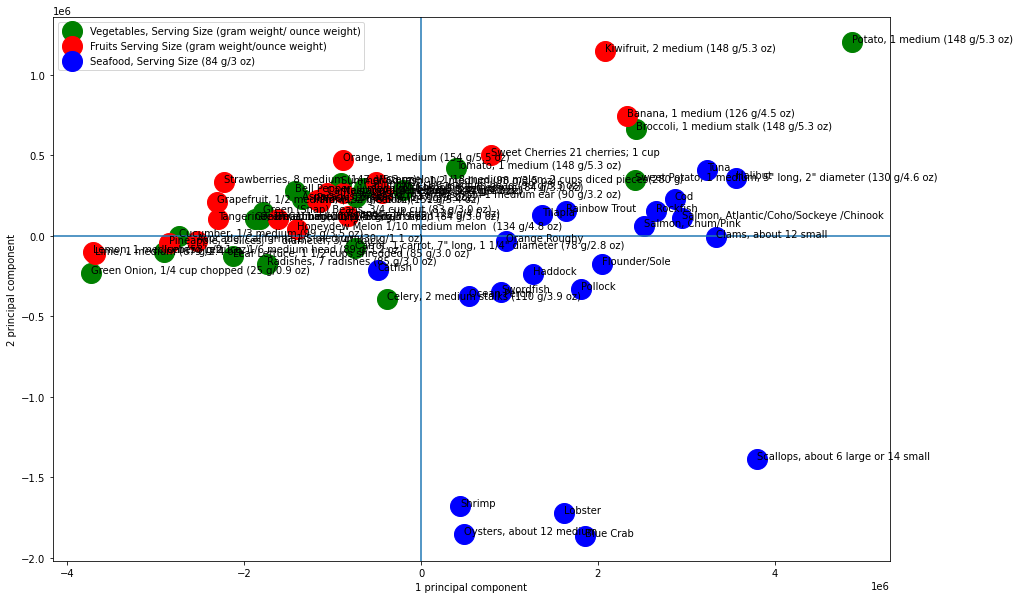

3 first dimensions


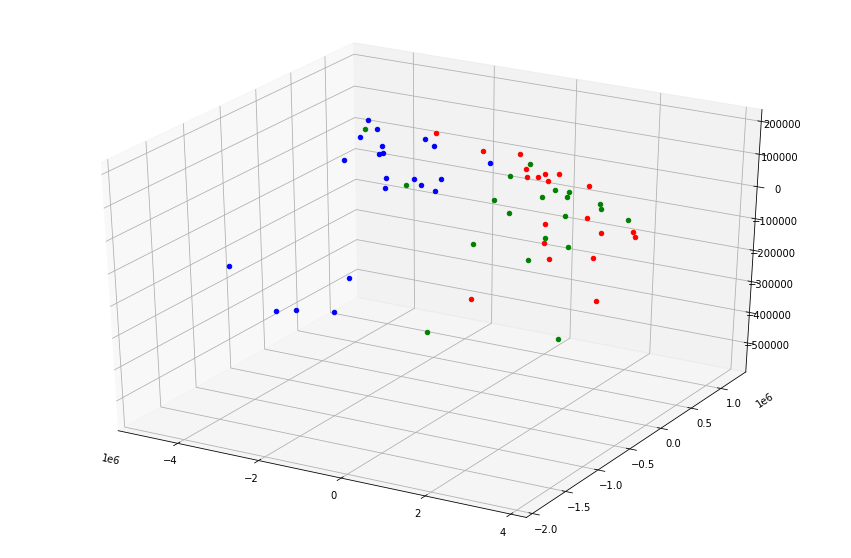

In [ ]:
k = 3

# this matrix has a size (items)x(k) and represent our food items in less-dimensional (k-dimensional) space
# in this new space the smaller the column index, the more valuable the component
W = eigenvectors[:, :k] @ np.diag(eigenvalues)[:k, :k]
Ak = Ac @ W


print("2 first dimensions")
show_points_2d(-Ak.T[0], Ak.T[1], "1 principal component", "2 principal component")
print("3 first dimensions")
show_points_3d(Ak.T[0],Ak.T[1], Ak.T[2])

# ПОДХОД ОСНОВАННЫЙ НА СИНГУЛЯРНОМ РАЗЛОЖЕНИИ

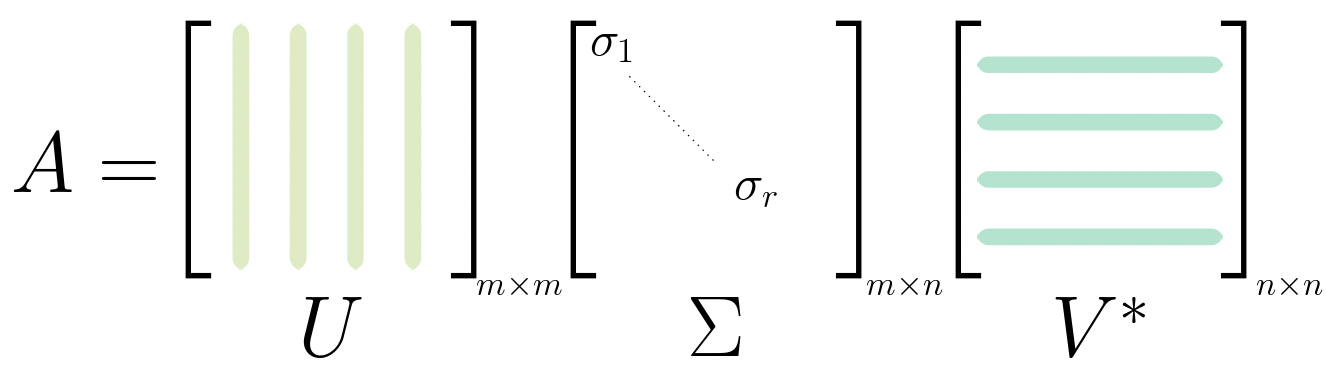



$$
\overline{A} = U Σ V^{\top}
$$

$$
\overline{A}^{\top}\overline{A} = U \lambda(\overline{A}^{\top}\overline{A}) U^{\top}\\
\overline{A}\overline{A}^{\top} = V \lambda(\overline{A} \overline{A}^{\top}) V^{\top}\\
$$


Проекция данных на никую расзмерность будет такой:

$$
\overline{A} = U Σ V^{\top} \\
\overline{A} V^{\top}[:, :k]  = U [:, :k] Σ [: k, :k]
$$

In [ ]:
u, s, v = np.linalg.svd(Ac, full_matrices = False)

In [ ]:
u.shape

(61, 22)

2 first dimensions


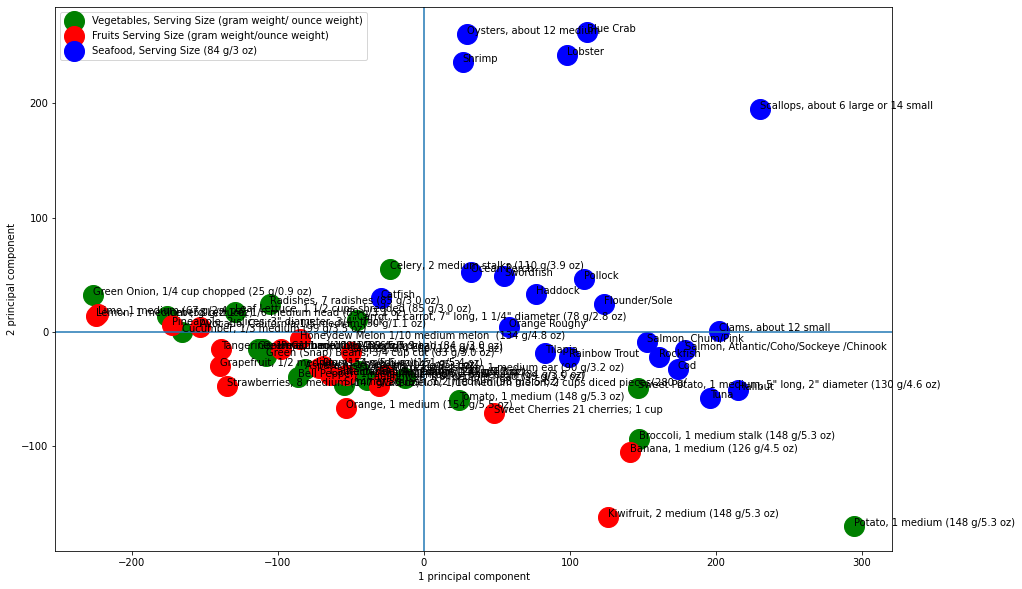

3 first dimensions


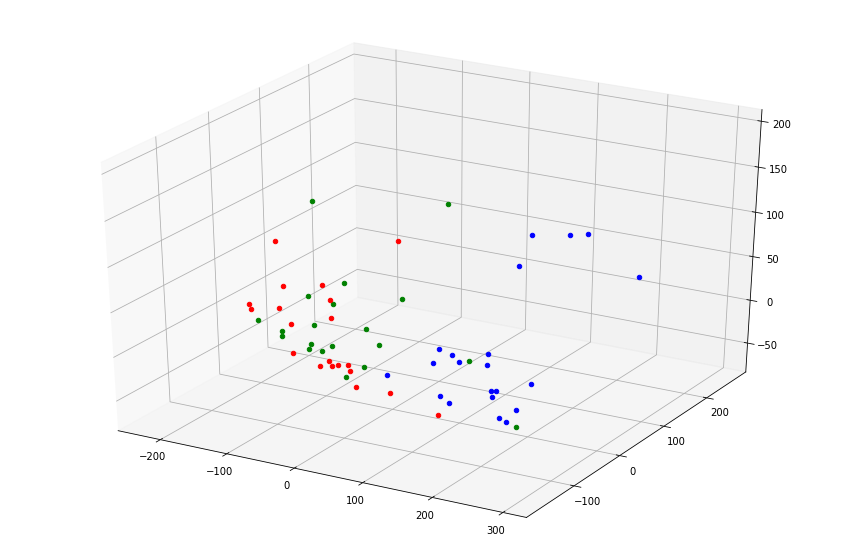

In [ ]:
k = 3

# this matrix has a size (items)x(k) and represent our food items in less-dimensional (k-dimensional) space
# in this new space the smaller the column index, the more valuable the component
Ak =  u[:, :k] @ np.diag(s[:k])



print("2 first dimensions")
show_points_2d(Ak.T[0], Ak.T[1], "1 principal component", "2 principal component")
print("3 first dimensions")
show_points_3d(Ak.T[0], Ak.T[1], Ak.T[2])

In [ ]:
u.shape, s.shape

((22, 22), (22,))

In [ ]:
eigenvectors.shape

(22, 22)

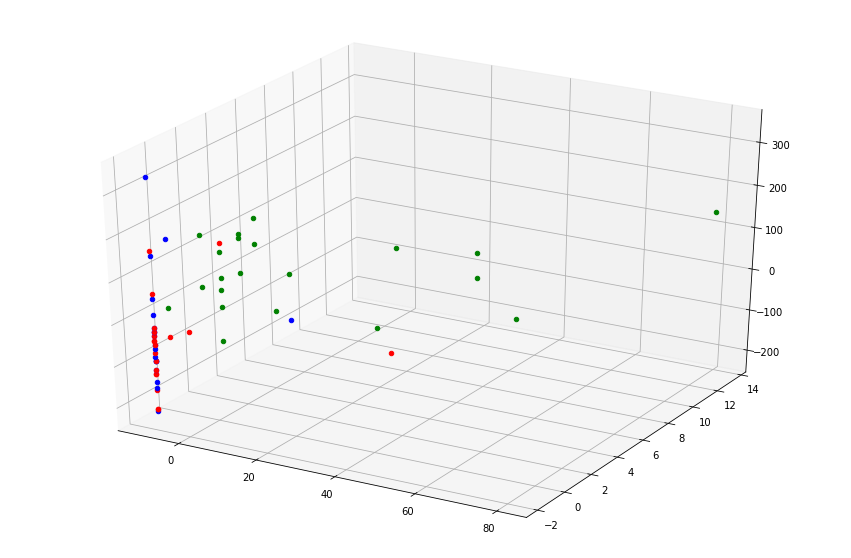

In [ ]:
show_points_3d(Ac.T[1], Ac.T[3], Ac.T[6])